10/03/2016  
by Numan Laanait  
email: laanaitn@ornl.gov


## Decomposition:
With this notebook you can do decomposition using PCA, NMF...
The datasets of interest are: __S026-S028__.  
These are L-scans (e.g. $\theta-2\theta$-scans) that were immediately acquired after biasing the thin-film.  
For details on the biasing conditions see __S025__.  
Before doing decomposition, you'll need to correct the datasets of interest and save them as shown in the latest corrections notebook.


In [3]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import os
from PyXRIM.PlotLib import imageTile
# We'll use the functions in decomFunctions.py to do the decomposition.
from functions import *
%matplotlib notebook

In [4]:
#Read the datasets

In [3]:
# Pick a region of interest (roi) that doesn't include the microprobe.
# group all corrected datasets into a list, i.e. data = [procDset1[roi]+10, procDset2[roi]+10, procDset3[roi]+10]
# the '+10' is needed if you use logscaling below. 


## PCA

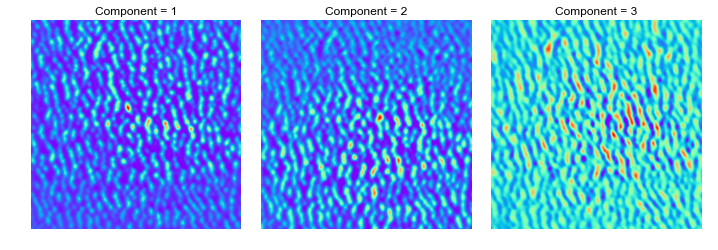

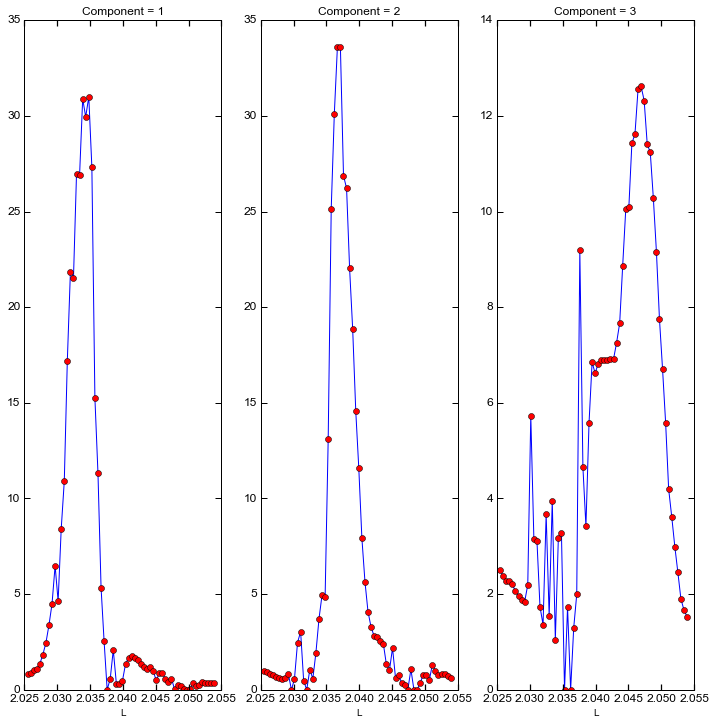

In [71]:
# PCA
two_theta = [procDset1.attrs('delta'),procDset2.attrs('delta'),procDset3.attrs('delta')]
xvals= two_theta
# You should do one PCA with logscaling = True and another with logscaling = False to compare.
data = preping(data, logscaling = True, 
               feature_scaling=False, feature_range=(0.1,1))
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
projec, eigenvec, var_ratio, pca = doPCA(data, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')

##NMF

In [29]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(data, 4, xvals=xvals,xlabel='L',cmap='rainbow')

IndexError: index out of range

Below is a set of plotting functions to generate nice plots of the projections `plotProjections()` and the eigenvectors `plotEncodings()` from a matrix decomposition.
### Homework: 
Modify it so it works for you!

In [56]:

def plotProjections(projections, slicing=(slice(None,None),slice(None,None)), stds=4,
                    save=False, filename= 'S005_NMF',**kwargs):
    """
    Plots Projection Maps

    Parameters:
    -------------
    projections : 3D numpy array. (projec #,y,x)
    slicing: region of the image. Tuple of slice() objects. 
    stds : int
        Number of standard deviations to consider for plotting
    save: bool, default false.
    Returns:
    ---------
    None
    """
    fig_h, fig_w = (12,12)
    rows = projections.shape[0]%2+2
    cols = 2
    fig, axes = plt.subplots(rows,cols, figsize=(fig_w, fig_h ))
#     fig.subplots_adjust(hspace=0.4, wspace=0.4)
#     fig.canvas.set_window_title("Projections")

    for ax,(index,imp) in zip(axes.flatten(),enumerate(projections)):
        maxIm = imp.max()
        std = imp.std()
        im = ax.imshow(imp[slicing[0],slicing[1]], vmin=0,vmax= maxIm,**kwargs)
        ax.axis('off')
        cbar = fig.colorbar(im, ax=ax, shrink=0.35)
        cbar.ax.tick_params(labelsize=12) 
        cbar.set_ticks(np.round(np.linspace(0,maxIm, 5),2))
        cbar.ax.set_title('$\log(I)$',fontsize=14)
        scalebar = ScaleBar(15e-9, 0.15,color ='w')
        ax.add_artist(scalebar)
    if save: fig.savefig('projections_'+filename+'.eps')
    
def plotEncodings(encodings, xvals=[], ylabel='', xlabel='',**kwargs):
    """
    Plots Encodings

    Parameters:
    -------------
    encodings : 2D numpy array. (encoding #,n_samples)
    xlabel,ylabel: plot labels.
    Returns:
    ---------
    None
    """
    fig_h, fig_w = (8, 8)
    rows = projec.shape[0]%2+2
    cols = 2
    fig, axes = plt.subplots(rows,cols, figsize=(cols * fig_w, rows * fig_h))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.canvas.set_window_title("Encodings")

    for ax,(index,imp) in zip(axes.flatten(),enumerate(projec)):
        mean = imp.mean()
        std = imp.std()
        im = ax.imshow(imp[slicing[0],slicing[1]], vmin=0,vmax= mean + stds * std,**kwargs)
        ax.axis('off')
        cbar = fig.colorbar(im, ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.set_ticks(np.round(np.linspace(0,mean + stds * std, 5),2))
        cbar.ax.set_title('arb. units.',fontsize=12)
        ax.axis('tight')
        ax.set_title('Projection= %d' % (index + 1))
        ax.set_aspect('auto')
        scalebar = ScaleBar(15e-9, 0.15,color ='w',fontsize=12)
        ax.add_artist(scalebar)
        ax.axis('off')
#     fig.tight_layout()

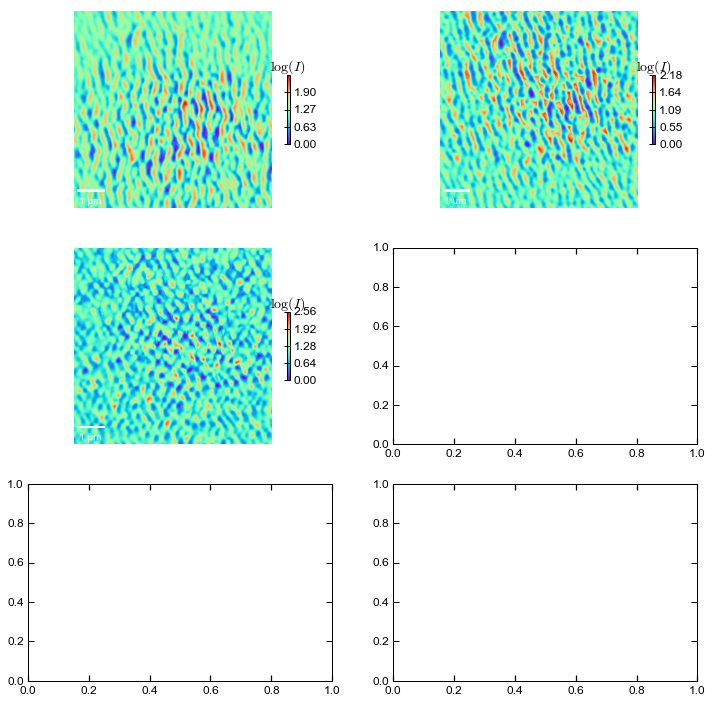

In [57]:
plotProjections(projec, cmap='rainbow')

In [ ]:
plotEncodings(eigenvec, cmap='rainbow')